<a href="https://colab.research.google.com/github/iqrasaifi/Assignment-DataAnalysis/blob/master/Assignment4_Iqra_Saifi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Using dataset_model.csv on Loan Application, build a Classification model to predict Loan Status(Target Variable) :**

In [0]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
from scipy import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df=pd.read_csv('/content/dataset_model.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [60]:
df.shape

(614, 13)

In [61]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [62]:
for i in df.columns:
  if(df[i].is_unique):
    df=df.drop(i,axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
df.shape

(614, 12)

In [64]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [65]:
print('Categorical Columns are:')
cat_cols=[]
for i in df.columns:
  if(len(df[i].unique())<15):
    cat_cols.append(i)
print(cat_cols)

Categorical Columns are:
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [66]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
cont_cols=[]
print('Continuous Columns are:')
for i in numeric_cols:
  if(len(df[i].unique())>15):
    cont_cols.append(i)
print(cont_cols)

Continuous Columns are:
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


**Use innovative methods for Outlier handling & Missing Values Imputation.**

Outlier Handling

In [0]:
q1=df.quantile(0.1)
q3=df.quantile(0.9)
iqr=q3-q1
cutoff=1.5*iqr
lower=q1-cutoff
upper=q3+cutoff
((df<lower)|(df>upper)).sum()
#Outlier Handling by Removing the Outliers using IQR
df1=df[~(((df<lower)|(df>upper))).any(axis=1)]

In [68]:
print(df.shape)
print(df1.shape)   # 88 records having the outliers have been removed.

(614, 12)
(526, 12)


As removing the records can lead to the improper training of the model, so we can go for some other method of outlier handling given below

Checking Skewness

In [69]:
for i in cont_cols:
  print(str(i)+' : '+str(df[i].skew()))

ApplicantIncome : 6.539513113994625
CoapplicantIncome : 7.491531216657306
LoanAmount : 2.677551679256059


In [70]:
#Outlier handling by quantile capping and flooring at 10% and 90%
for i in cont_cols:
  lower=df[i].quantile(0.10)
  upper=df[i].quantile(0.90)
  df[i]=np.where(df[i]<lower,lower,df[i])
  df[i]=np.where(df[i]>upper,upper,df[i])
  print('After Handling outlier, skewness of '+str(i)+' is: ',str(df[i].skew()))

After Handling outlier, skewness of ApplicantIncome is:  1.0177280847006973
After Handling outlier, skewness of CoapplicantIncome is:  0.5184989987479341
After Handling outlier, skewness of LoanAmount is:  0.6317364370380842


We can also use logarithmic transformations to narrow down the ranges but, here the dataset is not too large, so it can be capping and flooring method can be preferred.

Missing Values Imputation

In [71]:
#Number of Missing Values in each feature
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
#Imputing Missing values in Categorical Columns
for i in cat_cols:
  if ( df[i].isnull().sum() > 0):
    df[i] = df[i].fillna(df[i].mode().iloc[0])

In [0]:
#Imputing Missing values in Continuous Columns
for i in cont_cols:
  if ( df[i].isnull().sum() > 0):
    df[i] = df[i].fillna(df[i].median())

In [74]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now, No missing value is there in the dataset.

**Use Label Encoder as encoding technique on features**

In [78]:
le=LabelEncoder()
target_df=pd.DataFrame()
target_df['Loan_Status']=le.fit_transform(df['Loan_Status'])
target_df.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [79]:
print(df['Loan_Status'].value_counts())
lbl_1,lbl_0 = target_df['Loan_Status'].value_counts()
print("Label 1 class %age: "+str((lbl_1*100)/target_df['Loan_Status'].count()))
print("Label 0 class %age: "+str((lbl_0*100)/target_df['Loan_Status'].count()))

Y    422
N    192
Name: Loan_Status, dtype: int64
Label 1 class %age: 68.72964169381108
Label 0 class %age: 31.270358306188925


In [80]:
df=df.drop(columns='Loan_Status')
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [82]:
#Encoding Categorical Columns
cat_cols=list(set(cat_cols)-set(['Loan_Status']))
cat_cols
for i in cat_cols :
  df_le['enc_'+str(i)] = le.fit_transform(df_le[i])
df_loan_le = df_le.drop(columns = cat_cols)
df_loan_le.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_enc,Married_enc,Dependents_enc,Education_enc,Self_Employed_enc,Loan_Amount_Term_enc,Credit_History_enc,Property_Area_enc,enc_Gender,enc_Married,enc_Dependents,enc_Education,enc_Self_Employed,enc_Loan_Amount_Term,enc_Credit_History,enc_Property_Area
0,5849.0,0.0,128.0,1,0,0,0,0,8,1,2,1,0,0,0,0,8,1,2
1,4583.0,1508.0,128.0,1,1,1,0,0,8,1,0,1,1,1,0,0,8,1,0
2,3000.0,0.0,71.0,1,1,0,0,1,8,1,2,1,1,0,0,1,8,1,2
3,2583.0,2358.0,120.0,1,1,0,1,0,8,1,2,1,1,0,1,0,8,1,2
4,6000.0,0.0,141.0,1,0,0,0,0,8,1,2,1,0,0,0,0,8,1,2


In [83]:
df_loan_le.shape

(614, 19)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_loan_le, target_df, test_size=0.25, random_state=33 , stratify=target_df)

In [97]:
print('set of training features: ', len(X_train))
print('set of training label: ', len(Y_train))
print('set of testing features: ', len(X_test))
print('set of testing label: ', len(Y_test))

set of training features:  460
set of training label:  460
set of testing features:  154
set of testing label:  154


In [98]:
print('For Training')
print(Y_train['Loan_Status'].value_counts())
l1,l2=Y_train['Loan_Status'].value_counts()
print("Label 1 percentage: "+str((l1*100)/Y_train['Loan_Status'].count()))
print("Label 1 percentage: "+str((l2*100)/Y_train['Loan_Status'].count()))

print('\n For Testing')
print(Y_test['Loan_Status'].value_counts())
l1,l2=Y_test['Loan_Status'].value_counts()
print("Label 1 percentage: "+str((l1*100)/Y_test['Loan_Status'].count()))
print("Label 1 percentage: "+str((l2*100)/Y_test['Loan_Status'].count()))

For Training
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 percentage: 68.69565217391305
Label 1 percentage: 31.304347826086957

 For Testing
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 percentage: 68.83116883116882
Label 1 percentage: 31.16883116883117


1.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [99]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [100]:
y_pred=logistic_regression.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [101]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))

Confusion Matrix
[[ 21  27]
 [  2 104]]


In [181]:
print('Accuracy= ', accuracy_score(Y_test,y_pred))
print('Precision= ', precision_score(Y_test,y_pred))
print('Recall= ', recall_score(Y_test,y_pred))
print('F1 Score= ', f1_score(Y_test,y_pred))
print('ROC-AUC Score',roc_auc_score(Y_test,Y_pred))

Accuracy=  0.7727272727272727
Precision=  0.7983193277310925
Recall=  0.8962264150943396
F1 Score=  0.8444444444444444
ROC-AUC Score 0.6981132075471699


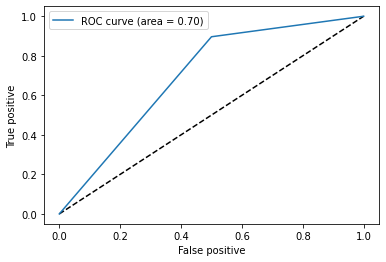

In [182]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,Y_pred))
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.legend(loc='best')

Tuning the parameters

In [132]:
logistic_regression=LogisticRegression()
param_grid={'class_weight':['balanced'],
            'random_state':[10,20,30,50],
               'multi_class':['multinomial'],
               'solver':['lbfgs','sag','saga','newton-cg','liblinear']}
log_reg=GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv= 3)
log_reg.fit(X_train, Y_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=10, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)


In [133]:
Y_pred = logistic_reg_best_dt.predict(X_test)
Y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [134]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred))

Confusion Matrix
[[25 23]
 [12 94]]


In [184]:
print('Accuracy= ', accuracy_score(Y_test,Y_pred))
print('Precision= ', precision_score(Y_test,Y_pred))
print('Recall= ', recall_score(Y_test,Y_pred))
print('F1 Score= ', f1_score(Y_test,Y_pred))
print('ROC-AUC Score',roc_auc_score(Y_test,Y_pred))
'''After tuning, accuracy reduced by 2%, precision increased by 1%, recall reduced by 10%, F1 score reduced by 3% 
ROC-AUC score increased by 1%'''

Accuracy=  0.7727272727272727
Precision=  0.7983193277310925
Recall=  0.8962264150943396
F1 Score=  0.8444444444444444
ROC-AUC Score 0.6981132075471699


'After tuning, accuracy reduced by 2%, precision increased by 1%, recall reduced by 10%, F1 score reduced by 3% \nROC-AUC score increased by 1%'

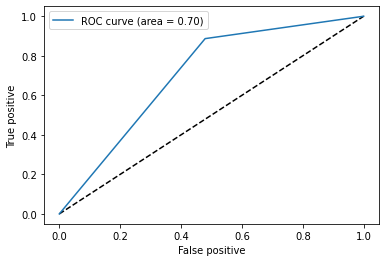

In [136]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,Y_pred))
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.legend(loc='best')

2.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on

Precision ,Recall & F1 Score ,AUROC

In [156]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [157]:
y_Pred=random_forest.predict(X_test)
y_Pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [158]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_Pred))

Confusion Matrix
[[ 23  25]
 [  6 100]]


In [185]:
print('Accuracy= ', accuracy_score(Y_test,y_Pred))
print('Precision= ', precision_score(Y_test,y_Pred))
print('Recall= ', recall_score(Y_test,y_Pred))
print('F1 Score= ', f1_score(Y_test,y_Pred))
print('ROC-AUC Score',roc_auc_score(Y_test,y_Pred))

Accuracy=  0.7987012987012987
Precision=  0.8
Recall=  0.9433962264150944
F1 Score=  0.8658008658008658
ROC-AUC Score 0.7112814465408804


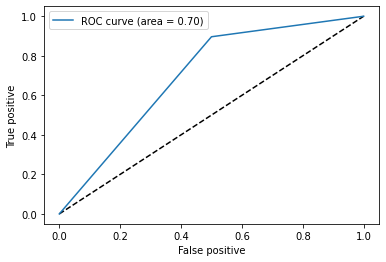

In [186]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,Y_pred))
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.legend(loc='best')

Tuning the Parameters

In [160]:
random_forest=RandomForestClassifier()
param_grid={'criterion':['gini', 'entropy'],
               'max_features':['sqrt', 'log2'],
               'class_weight':['balanced'],
               'max_depth':[30,10,50,45,37],
            'min_samples_split':[2,3,4]}

ran_for=GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 3)
ran_for.fit(X_train, Y_train)
ran_forest_best_dt = ran_for.best_estimator_
print(ran_forest_best_dt)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=30, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [161]:
Y_Pred = ran_forest_best_dt.predict(X_test)
Y_Pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1])

In [162]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_Pred))

Confusion Matrix
[[24 24]
 [ 8 98]]


In [187]:
print('Accuracy= ', accuracy_score(Y_test,Y_Pred))
print('Precision= ', precision_score(Y_test,Y_Pred))
print('Recall= ', recall_score(Y_test,Y_Pred))
print('F1 Score= ', f1_score(Y_test,Y_Pred))
print('ROC-AUC Score',roc_auc_score(Y_test,Y_Pred))
'''After tuning, accuracy and precision and roc-auc score are almost same, recall reduced by 2%,F1 score reduced by 1%'''

Accuracy=  0.7922077922077922
Precision=  0.8032786885245902
Recall=  0.9245283018867925
F1 Score=  0.8596491228070176
ROC-AUC Score 0.7122641509433962


'After tuning, accuracy and precision and roc-auc score are almost same, recall reduced by 2%,F1 score reduced by 1%'

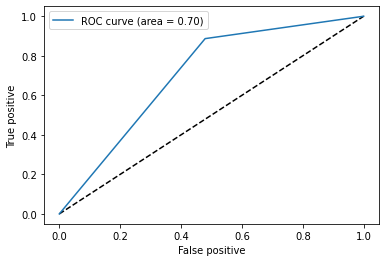

In [167]:
fpr, tpr, thresholds = roc_curve(Y_test,Y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,Y_pred))
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.legend(loc='best')

**Use One hot Encoder as encoding technique on feature**

In [168]:
df_ohe = df.copy()
for i in cat_cols :
   df_ohe = pd.get_dummies(df_ohe, columns=[i], prefix=[i] )
df_ohe.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Amount_Term_12.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Married_No,Married_Yes,Gender_Female,Gender_Male,Credit_History_0.0,Credit_History_1.0
0,5849.0,0.0,128.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1
1,4583.0,1508.0,128.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1
2,3000.0,0.0,71.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
3,2583.0,2358.0,120.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1
4,6000.0,0.0,141.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1


In [169]:
df_ohe.shape

(614, 30)

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(df_ohe, target_df, test_size=0.25, random_state=33 , stratify=target_df)

In [154]:
print('set of training features: ', len(X_train))
print('set of training label: ', len(Y_train))
print('set of testing features: ', len(X_test))
print('set of testing label: ', len(Y_test))

set of training features:  460
set of training label:  460
set of testing features:  154
set of testing label:  154


In [171]:
print('For Training')
print(Y_train['Loan_Status'].value_counts())
l1,l2=Y_train['Loan_Status'].value_counts()
print("Label 1 percentage: "+str((l1*100)/Y_train['Loan_Status'].count()))
print("Label 1 percentage: "+str((l2*100)/Y_train['Loan_Status'].count()))

print('\n For Testing')
print(Y_test['Loan_Status'].value_counts())
l1,l2=Y_test['Loan_Status'].value_counts()
print("Label 1 percentage: "+str((l1*100)/Y_test['Loan_Status'].count()))
print("Label 1 percentage: "+str((l2*100)/Y_test['Loan_Status'].count()))

For Training
1    316
0    144
Name: Loan_Status, dtype: int64
Label 1 percentage: 68.69565217391305
Label 1 percentage: 31.304347826086957

 For Testing
1    106
0     48
Name: Loan_Status, dtype: int64
Label 1 percentage: 68.83116883116882
Label 1 percentage: 31.16883116883117


3.Using Logistic Regression - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [195]:
lr= LogisticRegression()
lr.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
y_pred=lr.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [197]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))

Confusion Matrix
[[ 21  27]
 [  2 104]]


In [198]:
print('Accuracy= ', accuracy_score(Y_test,y_pred))
print('Precision= ', precision_score(Y_test,y_pred))
print('Recall= ', recall_score(Y_test,y_pred))
print('F1 Score= ', f1_score(Y_test,y_pred))
print('ROC-AUC Score',roc_auc_score(Y_test,y_pred))

Accuracy=  0.8116883116883117
Precision=  0.7938931297709924
Recall=  0.9811320754716981
F1 Score=  0.8776371308016877
ROC-AUC Score 0.7093160377358491


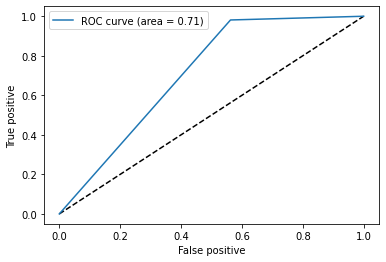

In [201]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.legend(loc='best')

Tuning the prameters

In [202]:
lr=LogisticRegression()
param_grid={'class_weight':['balanced'],
            'random_state':[10,20,30,50],
               'multi_class':['multinomial'],
               'solver':['lbfgs','sag','saga','newton-cg','liblinear']}
log_reg=GridSearchCV(estimator=lr, param_grid=param_grid, cv= 3)
log_reg.fit(X_train, Y_train)
logistic_reg_best_dt = log_reg.best_estimator_
print(logistic_reg_best_dt)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=10, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)


In [203]:
y_pred = logistic_reg_best_dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [204]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))

Confusion Matrix
[[24 24]
 [11 95]]


In [205]:
print('Accuracy= ', accuracy_score(Y_test,y_pred))
print('Precision= ', precision_score(Y_test,y_pred))
print('Recall= ', recall_score(Y_test,y_pred))
print('F1 Score= ', f1_score(Y_test,y_pred))
print('ROC-AUC Score',roc_auc_score(Y_test,y_pred))
'''after tuning, accuracy decreased by 4%, precision increased by 0.5%, recall decreased by 10%, f1 score deecreased by 4%, 
ROC-AUC curve decreased by 1% 
'''

Accuracy=  0.7727272727272727
Precision=  0.7983193277310925
Recall=  0.8962264150943396
F1 Score=  0.8444444444444444
ROC-AUC Score 0.6981132075471699


'after tuning, accuracy decreased by 4%, precision increased by 0.5%, recall decreased by 10%, f1 score deecreased by 4%, \nROC-AUC curve decreased by 1% \n'

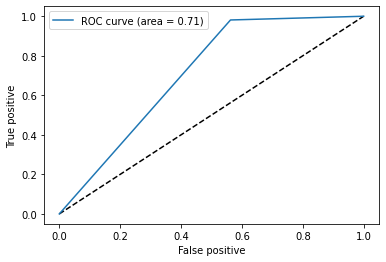

In [200]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.legend(loc='best')

4.Using RandomForest Classifier - Perform the parameter tuning and list your best performance metrics on -

Precision ,Recall & F1 Score ,AUROC

In [207]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [209]:
y_pred=rf.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [210]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))

Confusion Matrix
[[ 23  25]
 [  5 101]]


In [211]:
print('Accuracy= ', accuracy_score(Y_test,y_pred))
print('Precision= ', precision_score(Y_test,y_pred))
print('Recall= ', recall_score(Y_test,y_pred))
print('F1 Score= ', f1_score(Y_test,y_pred))
print('ROC-AUC Score',roc_auc_score(Y_test,y_pred))

Accuracy=  0.8051948051948052
Precision=  0.8015873015873016
Recall=  0.9528301886792453
F1 Score=  0.8706896551724137
ROC-AUC Score 0.7159984276729559


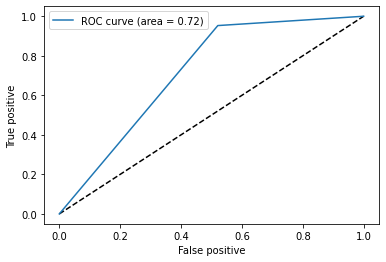

In [212]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.legend(loc='best')

Tuning the parameters

In [221]:
rf=RandomForestClassifier()
param_grid={'criterion':['gini', 'entropy'],
               'max_features':['sqrt', 'log2','auto'],
               'class_weight':['balanced'],
               'max_depth':[30,50,45,37],
            'min_samples_split':[3,4,5]}

ran_for=GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
ran_for.fit(X_train, Y_train)
ran_forest_best_dt = ran_for.best_estimator_
print(ran_forest_best_dt)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [222]:
y_pred = ran_forest_best_dt.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1])

In [223]:
print("Confusion Matrix")
print(confusion_matrix(Y_test,y_pred))

Confusion Matrix
[[25 23]
 [ 8 98]]


In [225]:
print('Accuracy= ', accuracy_score(Y_test,y_pred))
print('Precision= ', precision_score(Y_test,y_pred))
print('Recall= ', recall_score(Y_test,y_pred))
print('F1 Score= ', f1_score(Y_test,y_pred))
print('ROC-AUC Score',roc_auc_score(Y_test,y_pred))
'''after tuning, accuracy decreased by 1%, precision increased by 0.8%, recall is almost same, f1 score decreased by 1%, 
ROC-AUC score increased by 1%
'''

Accuracy=  0.7987012987012987
Precision=  0.8099173553719008
Recall=  0.9245283018867925
F1 Score=  0.8634361233480177
ROC-AUC Score 0.7226808176100629


'after tuning, accuracy decreased by 1%, precision increased by 0.8%, recall is almost same, f1 score decreased by 1%, \nROC-AUC score increased by 1%\n'

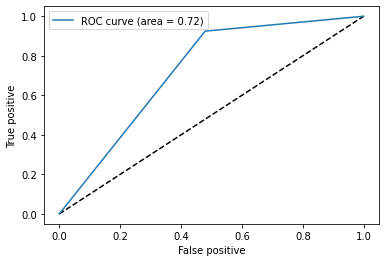

In [226]:
fpr, tpr, thresholds = roc_curve(Y_test,y_pred)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)'% roc_auc_score(Y_test,y_pred))
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.legend(loc='best')

# **Which approach between Label Encoding & One Hot Encoding gave better results in case of both the algorithms used ?**

In case of Logistic Regression,
Using label encoding without any tuning is better than ohe, but after tuning the case in both encodings, the accuracy decreases in label encoding while inceases in ohe.
> 
So, logistic Regression after tuning the  parameters in case of ohe gives better result.
> 
In case of Random Forest,
Using label encoding with or whitout tuning gives almost same results with very minute chnges in precision and recall and is almost same as ohe with tuning. On the other hand, in case of ohe without tuning, random forest is more accurate than in case of label encoding.
> 
So, random Forest without any tuning in case of ohe gives better result.